# Metrics and correlation

## Pearson Correlation Coefficient and California Housing
- this is an aside from the [Kaggle NLP Beginners Guide](https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners#Metrics-and-correlation)
- demonstrates metrics
- see the notebook I took on that guide for more information on the Pearson Correlation Coefficient
- they demonstrate it with the [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)
    - this demonstrates the median house value for California districts in `hundreds of thousands of dollars`
    - get it from the [scikit-learn](https://scikit-learn.org/stable/) library

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
# grab the California Housing Dataset
housing = fetch_california_housing(as_frame=True)
housing = housing["data"].join(housing["target"]).sample(1000, random_state=52)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7506,3.0550,37.0,5.152778,1.048611,729.0,5.062500,33.92,-118.28,1.054
4720,3.0862,35.0,4.697897,1.055449,1159.0,2.216061,34.05,-118.37,3.453
12888,2.5556,24.0,4.864905,1.129222,1631.0,2.395007,38.66,-121.35,1.057
13344,3.0057,32.0,4.212687,0.936567,1378.0,5.141791,34.05,-117.64,0.969
7173,1.9083,42.0,3.888554,1.039157,1535.0,4.623494,34.05,-118.19,1.192


In [ ]:
# set NumPy to only show a couple of decimal places, suppress 4.27e-01 into
np.set_printoptions(precision=2, suppress=True)
# view the Pearson Correlation Coefficients of each column w.r.t each other column
np.corrcoef(
    housing, rowvar=False
)  # (rowvar=False prevents it from printing out the shape too)
# obviously each variable has a perfect correlation with itself. Correlation with each other varies.

array([[ 1.  , -0.12,  0.43, -0.08,  0.01, -0.07, -0.12,  0.04,  0.68],
       [-0.12,  1.  , -0.17, -0.06, -0.31,  0.  ,  0.03, -0.13,  0.12],
       [ 0.43, -0.17,  1.  ,  0.76, -0.09, -0.07,  0.12, -0.03,  0.21],
       [-0.08, -0.06,  0.76,  1.  , -0.08, -0.07,  0.09,  0.  , -0.04],
       [ 0.01, -0.31, -0.09, -0.08,  1.  ,  0.16, -0.15,  0.13,  0.  ],
       [-0.07,  0.  , -0.07, -0.07,  0.16,  1.  , -0.16,  0.17, -0.27],
       [-0.12,  0.03,  0.12,  0.09, -0.15, -0.16,  1.  , -0.93, -0.16],
       [ 0.04, -0.13, -0.03,  0.  ,  0.13,  0.17, -0.93,  1.  , -0.03],
       [ 0.68,  0.12,  0.21, -0.04,  0.  , -0.27, -0.16, -0.03,  1.  ]])

In [14]:
# only show the correletion coefficients of a couple of variables relative to one another
np.corrcoef(housing.MedInc, housing.MedHouseVal)
# one of the highest correlations is that between median income and median house value

array([[1.  , 0.68],
       [0.68, 1.  ]])

In [ ]:
# write a function to extract just the useful number, discarding the correlation with themselves
def corr(x, y):
    return np.corrcoef(x, y)[0][1]


# just print the actual correlation between the two variables
corr(housing.MedInc, housing.MedHouseVal)

np.float64(0.6760250732906004)

- look at some correlation examples by making a function to create a scatter plot and label it with the **Pearson Correlation Coefficient**, `r`

In [ ]:
def show_corr(df, a, b):
    """show a scatter plot with correlation between columns a and b of a DataFrame"""
    x, y = df[a], df[b]
    plt.scatter(x, y, alpha=0.5, s=4)
    plt.title(f"{a} vs {b}; r: {corr(x, y):.2f}")
    plt.xlabel(a)
    plt.ylabel(b)

### Income vs House Value - strong correlation
- `r = 0.68` is a pretty strong correlation between `median income` and `median house value`
- note that it looks like houses above `$500,000` have been truncated to that value

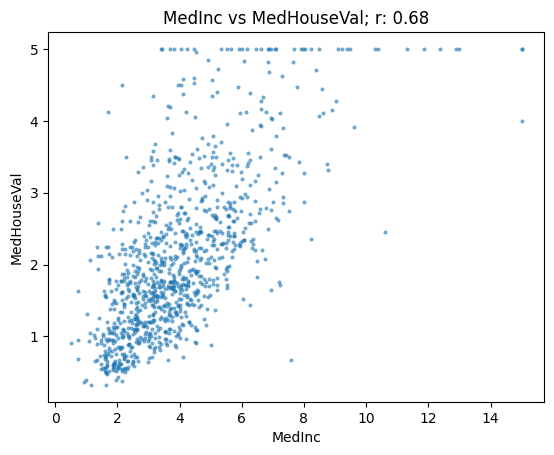

In [ ]:
show_corr(housing, "MedInc", "MedHouseVal")

### Room Count vs Income - outliers hide strong correlation
- `median income` and `average number of rooms` has a `lower r` despite a `tighter grouping`
- this is because `r` is *really* sensitive to outliers and we've got a few

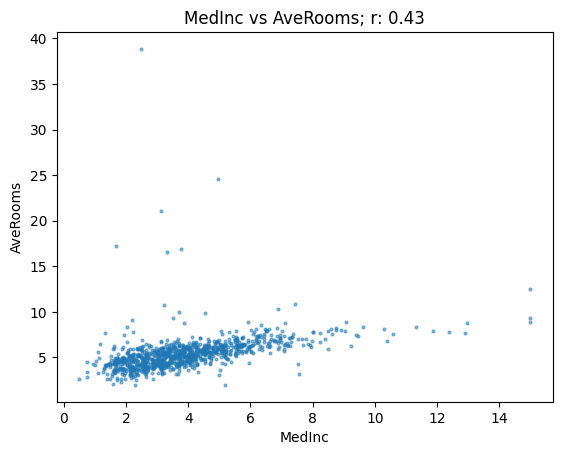

In [ ]:
show_corr(housing, "MedInc", "AveRooms")

- try again, but remove those crazy outlier houses that have 15 or more rooms 
- (basically chopping off the upper 2/3rds of the graph)
- now the correlation is `r = 0.68`, same as between `median income` and `median house value`

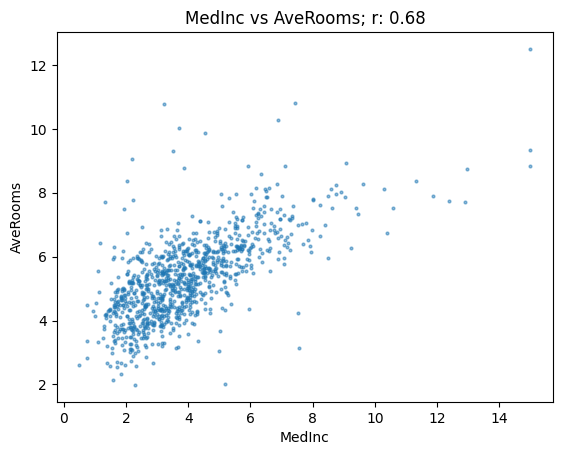

In [23]:
subset = housing[housing.AveRooms < 15]
show_corr(subset, "MedInc", "AveRooms")

### Room Count vs House Value - weaker correlation
- now look at the relationship between the `average number of rooms` and `median house value` for that `subset` of data
- `r = 0.34` - not that strong. more income is a stronger indicator than house value that a hosue will have more rooms.

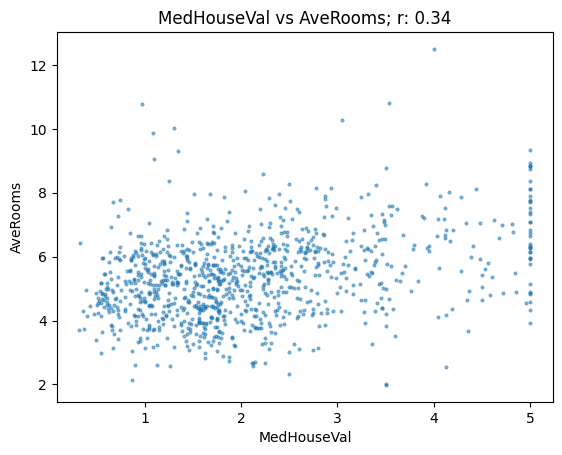

In [24]:
show_corr(subset, 'MedHouseVal', 'AveRooms')

### Room Count vs. House Age - weak negative correlation
- look at the relationship of the `age of the house` to the `number of rooms`
- first off, `age` isn't a continuous variable - it's measured in `years`, so there're vertical groups
- second, it's a very weak negative trend of `r=0.20`
- so they've been building bigger houses more recently, but it's a really weak indicator

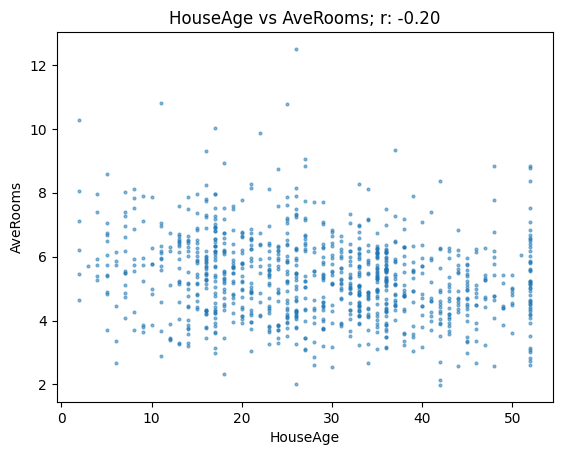

In [25]:
show_corr(subset, 'HouseAge', 'AveRooms')